# FORECASTING SYSTEM - DEMAND OF PRODUCTS AT A RETAIL OUTLET BASEED ON HISTORICAL DATA

## Importing modules ( Numpy,Pandas,Matplotlib,Statsmodels,Warning,Itertools)

In [67]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib


### Setting the display parameters

In [68]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] =14
matplotlib.rcParams['xtick.labelsize'] =12
matplotlib.rcParams['ytick.labelsize'] =12
matplotlib.rcParams['text.color']='k'

### Reading the data set and creating a data frame

In [69]:
df = pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


### Unique items

In [70]:
#No of items
x = df['item'].unique()
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


### Stores

In [71]:
#No of stores
x = df['store'].unique()
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


### DATA PREPROCESSING ON STORE-1

In [72]:
train_1 = df.loc[df['store']==1]
train_1.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [73]:
len(train_1)

91300

In [74]:
it1 = train_1.loc[train_1['item']==1]
it5 = train_1.loc[train_1['item']==5]
it15= train_1.loc[train_1['item']==15]
it25= train_1.loc[train_1['item']==25]
it30= train_1.loc[train_1['item']==30]
it40= train_1.loc[train_1['item']==40]

#### Item-1 

In [75]:
it1.head(3)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14


#### Item-5 

In [76]:
it5.head(3)

,date,store,item,sales
73040,2013-01-01,1,5,11
73041,2013-01-02,1,5,6
73042,2013-01-03,1,5,8


#### Item-15

In [77]:
it15.head(3)

,date,store,item,sales
255640,2013-01-01,1,15,42
255641,2013-01-02,1,15,33
255642,2013-01-03,1,15,45


#### Item-25

In [78]:
it25.head(3)

,date,store,item,sales
438240,2013-01-01,1,25,59
438241,2013-01-02,1,25,26
438242,2013-01-03,1,25,42


#### Item-30

In [79]:
it30.head(3)

,date,store,item,sales
529540,2013-01-01,1,30,17
529541,2013-01-02,1,30,25
529542,2013-01-03,1,30,25


#### Item-40

In [80]:
it40.head(3)

,date,store,item,sales
712140,2013-01-01,1,40,19
712141,2013-01-02,1,40,15
712142,2013-01-03,1,40,12


In [81]:
it1['date'].min()

'2013-01-01'

In [82]:
it1['date'].max()

'2017-12-31'

#### Arranging based on date

In [83]:
it1 = it1.sort_values('date')
it1.head(2)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11


In [84]:
it5 = it5.sort_values('date')
it5.head(2)

,date,store,item,sales
73040,2013-01-01,1,5,11
73041,2013-01-02,1,5,6


In [85]:
it15 = it15.sort_values('date')
it15.head(2)

,date,store,item,sales
255640,2013-01-01,1,15,42
255641,2013-01-02,1,15,33


In [86]:
it25 = it25.sort_values('date')
it25.head(2)

,date,store,item,sales
438240,2013-01-01,1,25,59
438241,2013-01-02,1,25,26


In [87]:
it30 = it30.sort_values('date')
it30.head(2)

,date,store,item,sales
529540,2013-01-01,1,30,17
529541,2013-01-02,1,30,25


In [88]:
it40 = it40.sort_values('date')
it40.head(2)

,date,store,item,sales
712140,2013-01-01,1,40,19
712141,2013-01-02,1,40,15


#### Checking for missing values

In [89]:
print('Null values for item-1')
print(it1.isnull().sum(),'\n')
print('Null values for item-5')
print(it5.isnull().sum(),'\n')
print('Null values for item-15')
print(it15.isnull().sum(),'\n')
print('Null values for item-25')
print(it25.isnull().sum(),'\n')
print('Null values for item-30')
print(it30.isnull().sum(),'\n')
print('Null values for item-40')
print(it40.isnull().sum(),'\n')

Null values for item-1
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-5
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-15
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-25
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-30
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-40
date     0
store    0
item     0
sales    0
dtype: int64 



### Note: From the above table we know that there are no null values for all the items therefore dropna() is not needed

#### Parsing dates and grouping by 'date'

In [90]:
it1['date'] = pd.to_datetime(it1['date'])
it1=it1.groupby('date')['sales'].sum().reset_index()
it1.head(3)

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14


In [91]:
it5['date'] = pd.to_datetime(it5['date'])
it5=it5.groupby('date')['sales'].sum().reset_index()
it5.head(3)

,date,sales
0,2013-01-01,11
1,2013-01-02,6
2,2013-01-03,8


In [92]:
it15['date'] = pd.to_datetime(it15['date'])
it15=it15.groupby('date')['sales'].sum().reset_index()
it15.head(3)

,date,sales
0,2013-01-01,42
1,2013-01-02,33
2,2013-01-03,45


In [93]:
it25['date'] = pd.to_datetime(it25['date'])
it25=it25.groupby('date')['sales'].sum().reset_index()
it25.head(3)

,date,sales
0,2013-01-01,59
1,2013-01-02,26
2,2013-01-03,42


In [94]:
it30['date'] = pd.to_datetime(it30['date'])
it30=it30.groupby('date')['sales'].sum().reset_index()
it30.head(3)

,date,sales
0,2013-01-01,17
1,2013-01-02,25
2,2013-01-03,25


In [95]:
it40['date'] = pd.to_datetime(it40['date'])
it40=it40.groupby('date')['sales'].sum().reset_index()
it40.head(3)

,date,sales
0,2013-01-01,19
1,2013-01-02,15
2,2013-01-03,12


#### Setting index

In [96]:
it1 =it1.set_index('date')
it1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=1826, freq=None)

In [97]:
y1 = it1['sales'].resample('MS').mean()
print('Item-1\n',y1['2017':],'\n')
it5=it5.set_index('date')
y5 = it5['sales'].resample('MS').mean()
print('Item-5\n',y5['2017':],'\n')
it15=it15.set_index('date')
y15 = it15['sales'].resample('MS').mean()
print('Item-15\n',y15['2017':],'\n')
it25=it25.set_index('date')
y25 = it25['sales'].resample('MS').mean()
print('Item-25\n',y25['2017':],'\n')
it30=it30.set_index('date')
y30 = it30['sales'].resample('MS').mean()
print('Item-30\n',y30['2017':],'\n')
it40=it40.set_index('date')
y40 = it40['sales'].resample('MS').mean()
print('Item-40\n',y40['2017':],'\n')

Item-1
 date
2017-01-01    15.645161
2017-02-01    17.392857
2017-03-01    18.096774
2017-04-01    22.566667
2017-05-01    24.935484
2017-06-01    28.333333
2017-07-01    28.161290
2017-08-01    25.612903
2017-09-01    24.533333
2017-10-01    21.290323
2017-11-01    22.266667
2017-12-01    17.193548
Freq: MS, Name: sales, dtype: float64 

Item-5
 date
2017-01-01    13.129032
2017-02-01    15.428571
2017-03-01    16.516129
2017-04-01    21.100000
2017-05-01    21.064516
2017-06-01    22.866667
2017-07-01    22.548387
2017-08-01    20.548387
2017-09-01    19.633333
2017-10-01    18.225806
2017-11-01    19.166667
2017-12-01    14.064516
Freq: MS, Name: sales, dtype: float64 

Item-15
 date
2017-01-01     65.000000
2017-02-01     69.071429
2017-03-01     79.548387
2017-04-01     96.000000
2017-05-01     99.483871
2017-06-01    107.700000
2017-07-01    114.612903
2017-08-01    103.258065
2017-09-01     93.766667
2017-10-01     88.451613
2017-11-01     95.500000
2017-12-01     69.096774
Freq

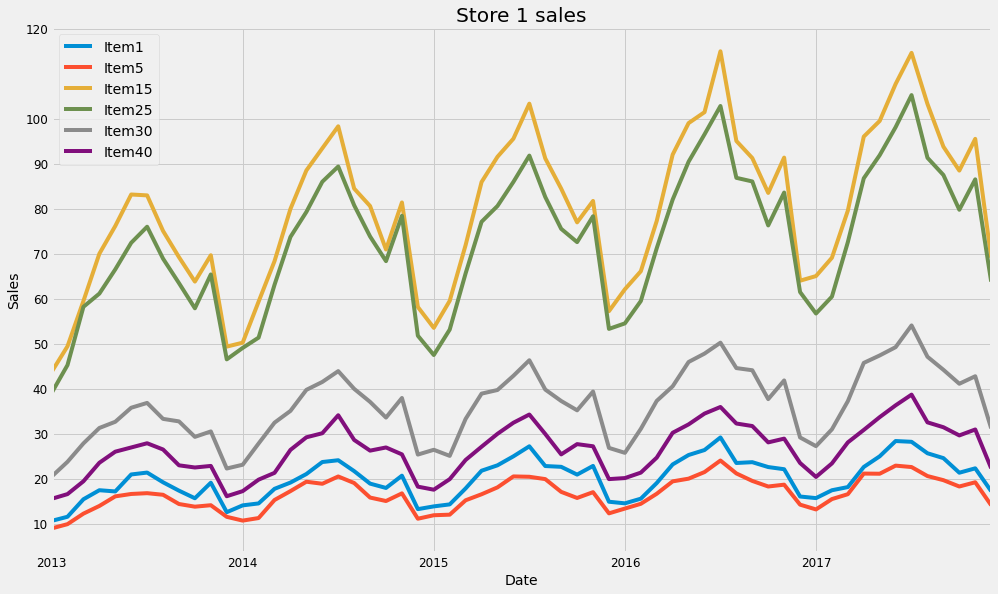

In [98]:
y1.plot(figsize=(15,9),label='Item1')
y5.plot(figsize=(15,9),label='Item5')
y15.plot(figsize=(15,9),label='Item15')
y25.plot(figsize=(15,9),label='Item25')
y30.plot(figsize=(15,9),label='Item30')
y40.plot(figsize=(15,9),label='Item40')
plt.title('Store 1 sales')
plt.title('Store 1 sales')
plt.yticks([10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('Date',fontdict={'fontsize':14})
plt.ylabel('Sales',fontdict={'fontsize':14})
plt.legend()
plt.show()

### DATA PREPROCESSING ON STORE-5

In [99]:
train_5 = df.loc[df['store']==5]
train_5.head()

,date,store,item,sales
7304,2013-01-01,5,1,11
7305,2013-01-02,5,1,9
7306,2013-01-03,5,1,12
7307,2013-01-04,5,1,8
7308,2013-01-05,5,1,13


In [100]:
len(train_5)

91300

In [101]:
ite1 = train_5.loc[train_5['item']==1]
ite5 = train_5.loc[train_5['item']==5]
ite15= train_5.loc[train_5['item']==15]
ite25= train_5.loc[train_5['item']==25]
ite30= train_5.loc[train_5['item']==30]
ite40= train_5.loc[train_5['item']==40]

In [102]:
ite1 = ite1.sort_values('date')
ite1.head(2)

,date,store,item,sales
7304,2013-01-01,5,1,11
7305,2013-01-02,5,1,9


In [103]:
ite5 = ite5.sort_values('date')
ite5.head(2)

,date,store,item,sales
80344,2013-01-01,5,5,9
80345,2013-01-02,5,5,5


In [104]:
ite15 = ite15.sort_values('date')
ite15.head(2)

,date,store,item,sales
262944,2013-01-01,5,15,31
262945,2013-01-02,5,15,31


In [105]:
ite25 = ite25.sort_values('date')
ite25.head(2)

,date,store,item,sales
445544,2013-01-01,5,25,37
445545,2013-01-02,5,25,39


In [106]:
ite30 = ite30.sort_values('date')
ite30.head(2)

,date,store,item,sales
536844,2013-01-01,5,30,16
536845,2013-01-02,5,30,17


In [107]:
ite40 = ite40.sort_values('date')
ite40.head(2)

,date,store,item,sales
719444,2013-01-01,5,40,18
719445,2013-01-02,5,40,10


#### Checking for null values

In [108]:
print('Null values for item-1')
print(ite1.isnull().sum(),'\n')
print('Null values for item-5')
print(ite5.isnull().sum(),'\n')
print('Null values for item-15')
print(ite15.isnull().sum(),'\n')
print('Null values for item-25')
print(ite25.isnull().sum(),'\n')
print('Null values for item-30')
print(ite30.isnull().sum(),'\n')
print('Null values for item-40')
print(ite40.isnull().sum(),'\n')

Null values for item-1
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-5
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-15
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-25
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-30
date     0
store    0
item     0
sales    0
dtype: int64 

Null values for item-40
date     0
store    0
item     0
sales    0
dtype: int64 



In [109]:
ite1['date'] = pd.to_datetime(ite1['date'])
ite1=ite1.groupby('date')['sales'].sum().reset_index()
ite1.head(2)

,date,sales
0,2013-01-01,11
1,2013-01-02,9


In [110]:
ite5['date'] = pd.to_datetime(ite5['date'])
ite5=ite5.groupby('date')['sales'].sum().reset_index()
ite5.head(2)

,date,sales
0,2013-01-01,9
1,2013-01-02,5


In [111]:
ite15['date'] = pd.to_datetime(ite15['date'])
ite15=ite15.groupby('date')['sales'].sum().reset_index()
ite15.head(2)

,date,sales
0,2013-01-01,31
1,2013-01-02,31


In [112]:
ite25['date'] = pd.to_datetime(ite25['date'])
ite25=ite25.groupby('date')['sales'].sum().reset_index()
ite25.head(2)

,date,sales
0,2013-01-01,37
1,2013-01-02,39


In [113]:
ite30['date'] = pd.to_datetime(ite30['date'])
ite30=ite30.groupby('date')['sales'].sum().reset_index()
ite30.head(2)

,date,sales
0,2013-01-01,16
1,2013-01-02,17


In [114]:
ite40['date'] = pd.to_datetime(ite40['date'])
ite40=ite40.groupby('date')['sales'].sum().reset_index()
ite40.head(2)

,date,sales
0,2013-01-01,18
1,2013-01-02,10


In [115]:
ite1=ite1.set_index('date')
x1 = ite1['sales'].resample('MS').mean()
ite5=ite5.set_index('date')
x5 = ite5['sales'].resample('MS').mean()
ite15=ite15.set_index('date')
x15 = ite15['sales'].resample('MS').mean()
ite25=ite25.set_index('date')
x25 = ite25['sales'].resample('MS').mean()
ite30=ite30.set_index('date')
x30 = ite30['sales'].resample('MS').mean()
ite40=ite40.set_index('date')
x40 = ite40['sales'].resample('MS').mean()

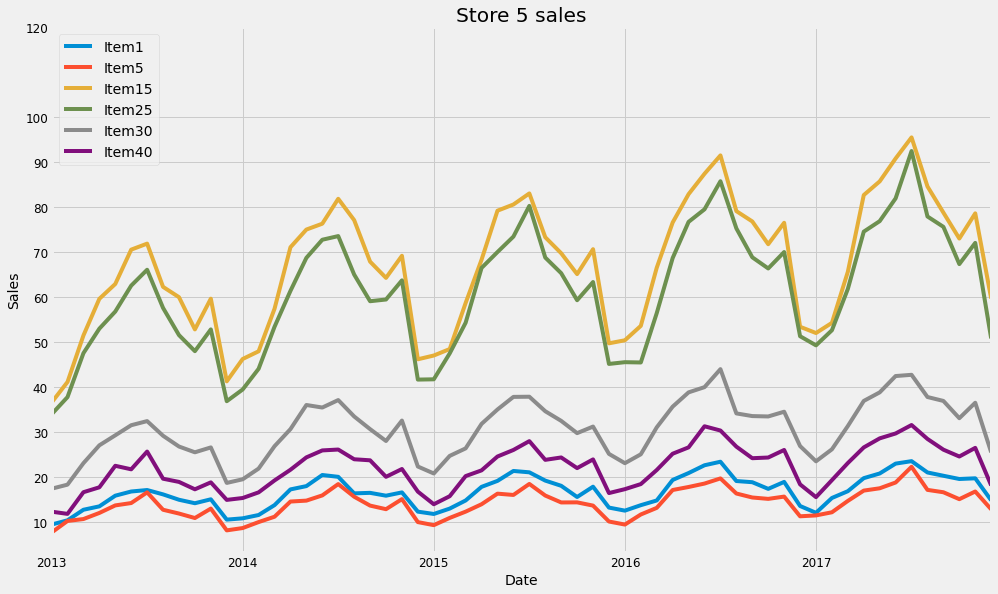

In [116]:
x1.plot(figsize=(15,9),label='Item1')
x5.plot(figsize=(15,9),label='Item5')
x15.plot(figsize=(15,9),label='Item15')
x25.plot(figsize=(15,9),label='Item25')
x30.plot(figsize=(15,9),label='Item30')
x40.plot(figsize=(15,9),label='Item40')
plt.title('Store 5 sales')
plt.yticks([10,20,30,40,50,60,70,80,90,100,120])
plt.xlabel('Date',fontdict={'fontsize':14})
plt.ylabel('Sales',fontdict={'fontsize':14})
plt.legend()
plt.show()